In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Puesta en marcha de los datos de entrenamiento

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


## Creación del modelo

In [9]:
L0 = tf.keras.layers.Dense(units=1, input_shape=[1])

input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [10]:
L0

<Dense name=dense_2, built=False>

In [11]:
model = tf.keras.Sequential([L0])

## Compila el modelo

In [12]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

## Entrena el modelo

In [14]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=True)
print("Finished training the model")

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.7943
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.6773
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.5617
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.4474
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.3346
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.2231
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.1130
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.0043
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.8968
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.7907
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6859
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.5824
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4801
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.3791
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.2794
Epoch 16/500
1/1 ━━

This cycle of calculate, compare, adjust is controlled by the fit method. 
* The **first** argument is the inputs, the **second** argument is the desired outputs. 
* The **epochs** argument specifies how many times this cycle should be run, and the **verbose** argument controls how much output the method produces.

## Dibuja las estadísticas de entrenamiento

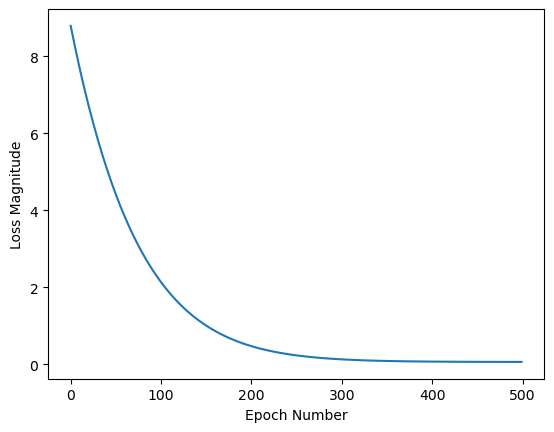

In [15]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Usar el modelo para predecir

In [16]:
print(model.predict(np.array([100])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[211.74275]]


### The correct answer is  100×1.8+32=212 , so our model is doing really well.

## Los pesos de las capas

In [17]:
print("These are the layer variables: {}".format(L0.get_weights()))

These are the layer variables: [array([[1.7982279]], dtype=float32), array([31.919962], dtype=float32)]


## Un experimento

In [18]:
L0 = tf.keras.layers.Dense(units=4, input_shape=[1]) # 4 neuronas
L1 = tf.keras.layers.Dense(units=4) # 4 neuronas
L2 = tf.keras.layers.Dense(units=1) # 1 neurona

model = tf.keras.Sequential([L0, L1, L2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict(np.array([100.0])))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict(np.array([100.0]))))
print("These are the L0 variables: {}".format(L0.get_weights()))
print("These are the L1 variables: {}".format(L1.get_weights()))
print("These are the L2 variables: {}".format(L2.get_weights()))

C:\Users\ftorr\anaconda3\envs\NuevoAmbiente\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished training the model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[211.74744]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the L0 variables: [array([[ 0.16500303, -0.35202527, -0.51697624, -0.127266  ]],
      dtype=float32), array([-2.4404383, -3.1300297, -2.9101572,  1.971749 ], dtype=float32)]
These are the L1 variables: [array([[-0.14542012, -0.13381548, -0.4426567 ,  0.9226578 ],
       [-0.5367667 ,  0.97023267, -1.3045725 , -0.14615904],
       [-1.0903064 , -0.08266124, -1.3623244 ,  0.7857835 ],
       [-0.04596457, -0.35315615,  0.23188561, -0.96974176]],
      dtype=float32), array([ 3.2290049, -2.239249 ,  3.2294025, -3.2365634], dtype=float32)]
These are the L2 variables: [array([[ 0.72621816],
       [-0.2701724 ],
       [ 1.0577273 ],
       [-0.8566329 ]], dtype=float32), array([2.9699275], dtype=float32)]


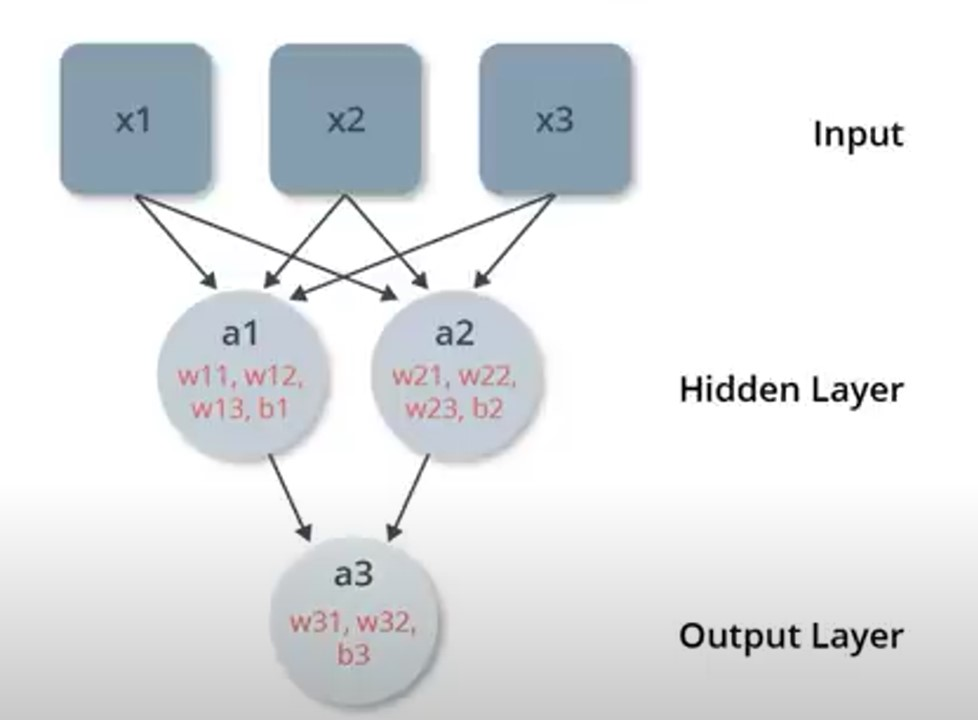

In [19]:
from IPython.display import Image
Image(filename='../python-ml-course/notebooks/resources/RedNeuronal.jpg')

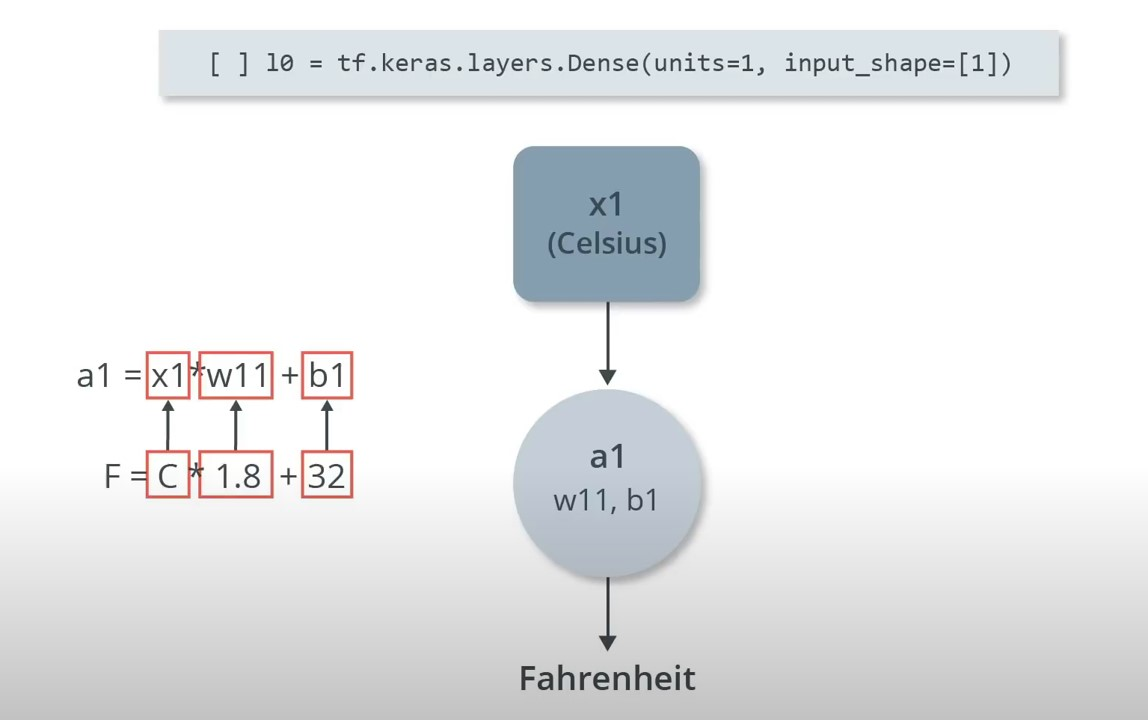

In [20]:
Image(filename='../python-ml-course/notebooks/resources/RedNeuronal2.jpg')

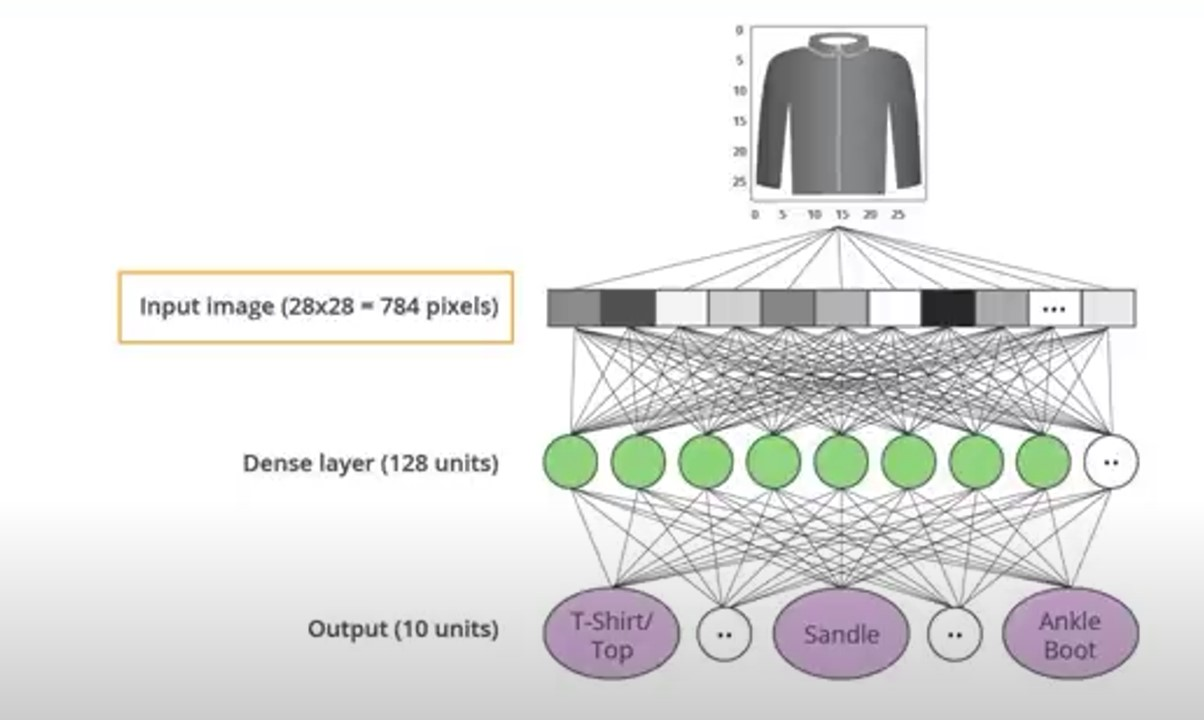

In [21]:
Image(filename='../python-ml-course/notebooks/resources/RedNeuronal3.jpg')

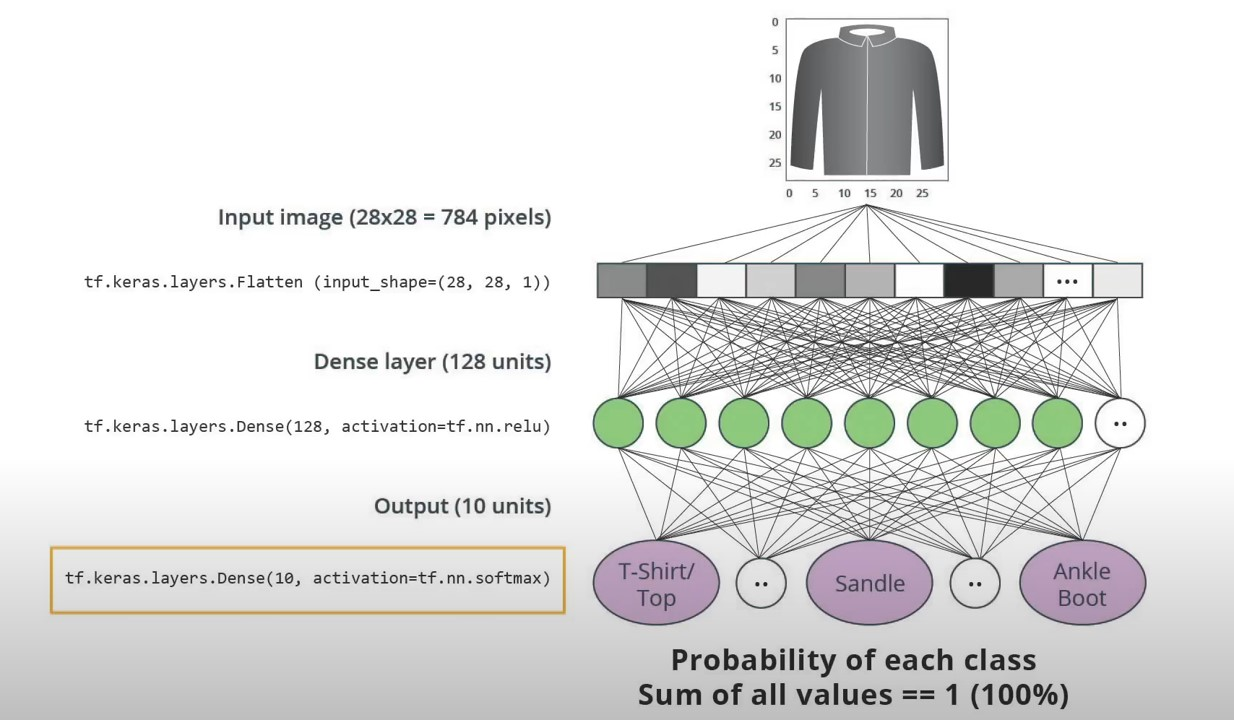

In [22]:
Image(filename='../python-ml-course/notebooks/resources/RedNeuronal4.jpg')

## Clasificación de imágenes

In [23]:
!pip install -U tensorflow_datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 5.1/5.1 MB 28.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   ------------- -------------------------- 8.4/25.2 MB 37.1 MB/s eta 0:00:01
   --------------------------- ------------ 17.6/25.2 MB 41.0 MB/s eta 0:00:01
   ---------------------------------------  24.9/25.2 MB 41.5 MB/s eta 0:00:01
   ---------------------------------------- 25.2/25.2 MB 38.8 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21545 sha256=ca1244ca46505827267e97ad458f86809d493e6c25943d9c77f96761445b4e01
  Stored in directory: c:\users\ftorr\appdata\local\pip\cache\wheels\90\74\b1\9b54c896b8d9409e9268329d4d45ede8a8040abe91c8879932
Successfully built promise


In [24]:
import tensorflow as tf

In [25]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Importar la base de vestidos MNIST

In [44]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [45]:
dataset

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [46]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [47]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Explorando la data

In [48]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


## Preprocesando

In [49]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

## Explorando los datos procesados

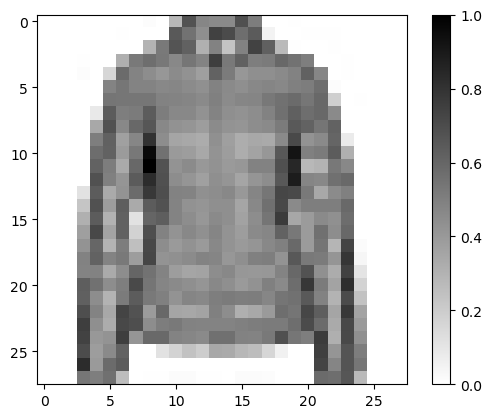

In [50]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

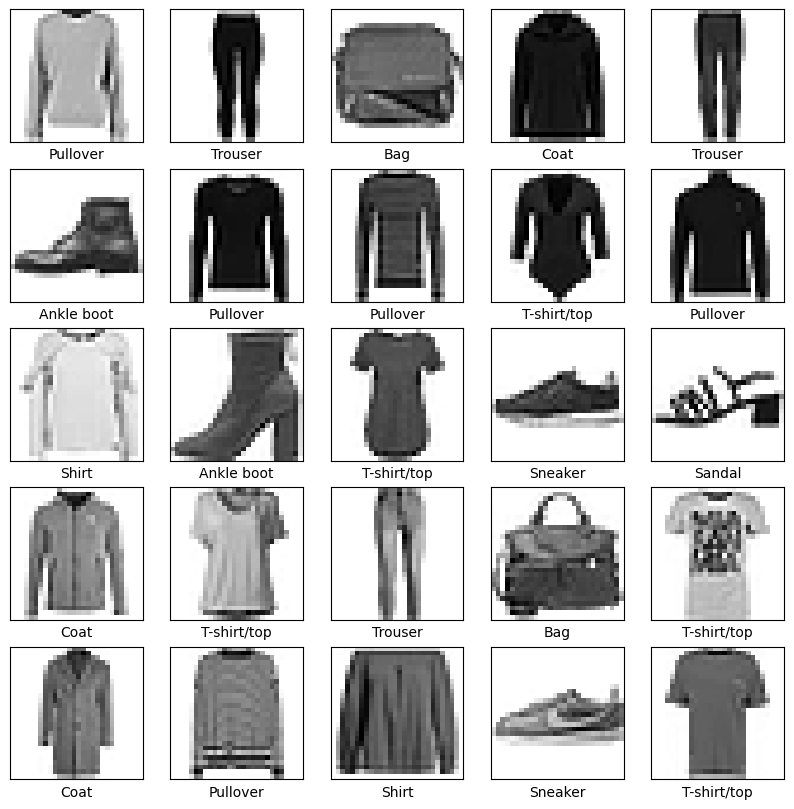

In [51]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

## El modelo

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compilar el modelo

In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Entrena el modelo

In [54]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [55]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7801 - loss: 0.6328
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8607 - loss: 0.3863
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8758 - loss: 0.3424
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8838 - loss: 0.3193
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8916 - loss: 0.2928


## Evaluar la precisión del modelo

In [56]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8788 - loss: 0.3432
Accuracy on test dataset: 0.8755999803543091


## Predicciones con el modelo

In [57]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [58]:
predictions.shape

(32, 10)

In [59]:
predictions[0]

array([2.6226246e-05, 1.6204556e-05, 1.7528884e-02, 7.2624681e-07,
       9.5004797e-01, 5.2392942e-12, 3.2373790e-02, 5.0637664e-11,
       6.1454134e-06, 6.6498065e-09], dtype=float32)

In [60]:
np.argmax(predictions[0])

4

In [61]:
test_labels[0]

4

In [62]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

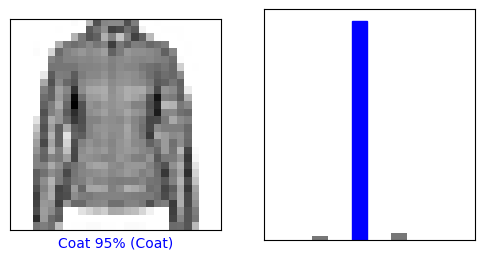

In [63]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

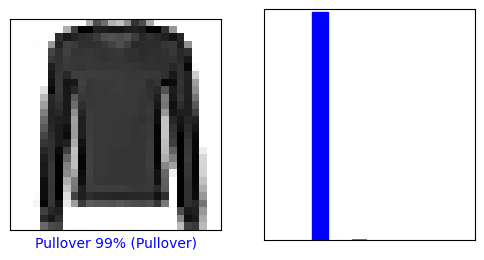

In [64]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

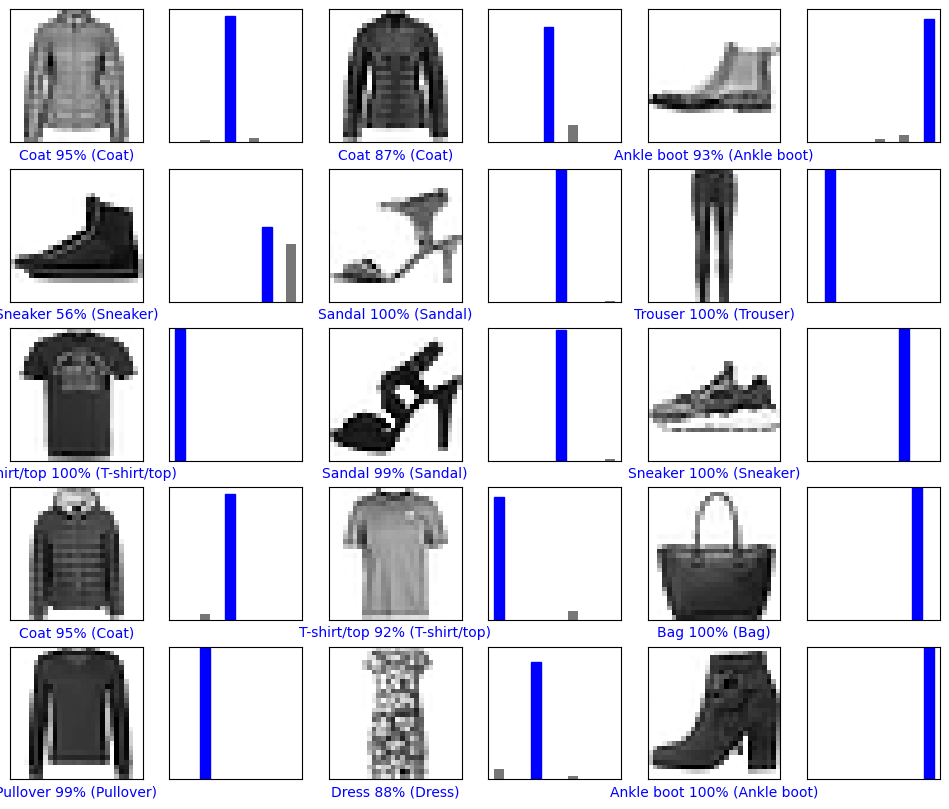

In [65]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [82]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [83]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [84]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[2.6226220e-05 1.6204540e-05 1.7528879e-02 7.2624539e-07 9.5004797e-01
  5.2392543e-12 3.2373767e-02 5.0637567e-11 6.1454080e-06 6.6498065e-09]]


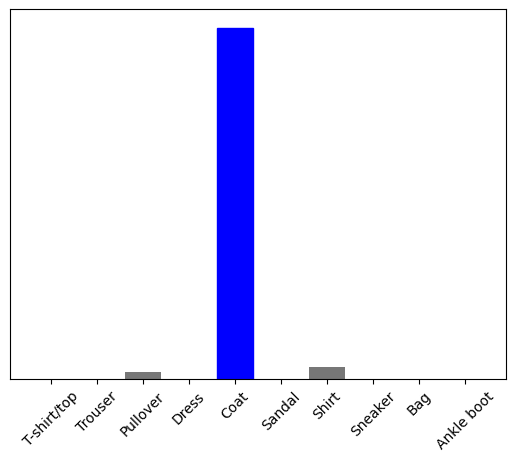

In [86]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [87]:
np.argmax(predictions_single[0])

4

In [92]:
# Grab an image from the test dataset
img = test_images[8]
test_labels[0] = test_labels[8]

print(img.shape)

(28, 28, 1)


In [93]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [94]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[9.7102093e-06 4.3767423e-06 4.6203616e-07 6.7460564e-06 8.4552670e-07
  9.4109552e-04 9.7946031e-06 9.9743491e-01 1.9761833e-06 1.5900088e-03]]


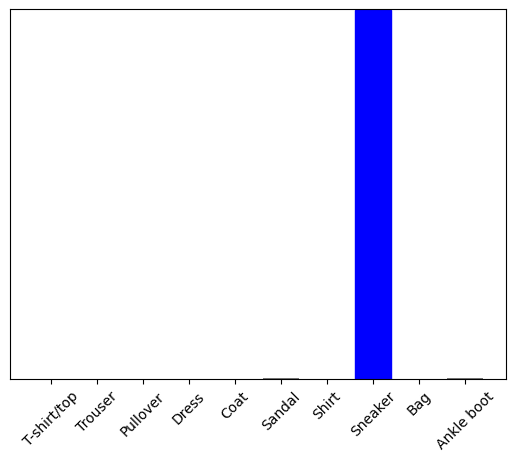

In [95]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [78]:
np.argmax(predictions_single[0])

7

In [79]:
test_labels[8]

7